## Leveraged vs Unleveraged OIL ETF Comparison
___

A quick and dirty empirical reason to invest in something other than UWTI given your bullish OIL theory

In [1]:
# ================================================================== #

import pandas as pd
import numpy as np
import pandas.io.data as web
from pandas.tseries.offsets import *
import datetime as dt

import cufflinks 
from plotly_create_layout import create_layout as clout
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as dates
%matplotlib inline
size=(12,7)

import seaborn as sns
sns.set_style('whitegrid')
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

# ================================================================== #
# datetime management

date_today = dt.date.today()
d_mon, d_day = date_today.month, date_today.day

last_month = date_today - 21 * BDay() # switch to 21

one_year_ago = date_today - 252 * BDay()
five_years_ago = date_today - (5 * 252 * BDay())
ten_years_ago = date_today - (10 * 252 * BDay())
max_years_ago = date_today - (25 * 252 * BDay())

Get Prices of OIL and UWTI the 3x leveraged version of OIL


In [2]:
%%time

sym_list = ['OIL', 'UWTI']
# ================================================================== #
# define function to get prices from yahoo finance
def get_px(stock, start, end):  
    try:
        return web.DataReader(stock, 'yahoo', start, end)['Adj Close']
    except Exception as e:
        print( 'something is fucking up' )
        
# ================================================================== #
px = pd.DataFrame()
for symbol in sym_list:
    px[symbol] = get_px( symbol, max_years_ago, date_today )
print('{}\n{}'.format(px.tail(), px.info()))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2239 entries, 2006-08-16 to 2015-07-09
Data columns (total 2 columns):
OIL     2239 non-null float64
UWTI    859 non-null float64
dtypes: float64(2)
memory usage: 52.5 KB
              OIL  UWTI
Date                   
2015-07-02  11.41  2.80
2015-07-06  10.61  2.25
2015-07-07  10.61  2.26
2015-07-08  10.35  2.12
2015-07-09  10.54  2.24
None
Wall time: 2.53 s


Keeping it simple let's compare the highest and lowest prices of 2015

In [3]:
# let's use a recent example from 2015; 
max_p = px['2015'].idxmax()
min_p = px['2015'].idxmin()
print('Date of Max Price:\n{}\n\nDate of Min Price:\n{}\n\nN days between OIL high and low:\n{}'.format(max_p, min_p, max_p - min_p))

Date of Max Price:
OIL    2015-05-06
UWTI   2015-01-02
dtype: datetime64[ns]

Date of Min Price:
OIL    2015-03-17
UWTI   2015-03-17
dtype: datetime64[ns]

N days between OIL high and low:
OIL     50 days
UWTI   -74 days
dtype: timedelta64[ns]


Calculate the price difference between 2015 Unlevered OIL ETF max price and min price

In [4]:
# Calculate the price difference between 2015 Unlevered OIL ETF max price and min price
oil_px_max = px['OIL'].loc[max_p[0]]  
oil_px_min = px['OIL'].loc[min_p[0]]

print('Max OIL ETF Price:\n{}\n\nMin OIL ETF Price:\n{}\n\nPrice Diff between OIL high and low:\n{}'.format(oil_px_max, oil_px_min, oil_px_max - oil_px_min))

Max OIL ETF Price:
12.69

Min OIL ETF Price:
9.44

Price Diff between OIL high and low:
3.25


Calculate the price difference between 2015 UWTI ETF during the same time period

In [5]:
# Calculate the price difference between 2015 UWTI ETF max price and min price
uwti_px_max = px['UWTI'].loc[max_p[0]]
uwti_px_min = px['UWTI'].loc[min_p[0]]

print('UWTI ETF Price @ OIL Max P$:\n{}\n\nUWTI ETF Price @ Min ETF Price:\n{}\n\nUWTI Price Diff between OIL high and low:\n{}'.format(uwti_px_max, uwti_px_min, round(uwti_px_max - uwti_px_min, 2)))

UWTI ETF Price @ OIL Max P$:
3.89

UWTI ETF Price @ Min ETF Price:
1.92

UWTI Price Diff between OIL high and low:
1.97


1. Calculate the continuously compounded rate of return assuming purchase of OIL ETF at the minimum price
2. Calculate same return assuming purchase of UWTI at OIL ETF's minimum price
3. Calculate the difference in returns between borrowing to purchase 3x OIL and investing directly in UWTI

In [6]:
# Calculate the continuously compounded rate of return assuming purchase of OIL ETF at the minimum price
theoretical_3xOIL_ret = 3 * np.log(oil_px_max/oil_px_min)#round(3 * np.log(oil_px_max/oil_px_min), 4)
# Calculate same return assuming purchase of UWTI at OIL ETF's minimum price
actual_UTWI_ret = np.log(uwti_px_max/uwti_px_min) #round(np.log(uwti_px_max/uwti_px_min), 4)
print('Theoretical 3x OIL Return:\n{}\n\nActual UWTI ETF Return:\n{}\n\nDiff between theoretical and Actual Returns due to Futures Roll Costs:\n{}'.format(theoretical_3xOIL_ret, actual_UTWI_ret, round(theoretical_3xOIL_ret - actual_UTWI_ret, 4)))

Theoretical 3x OIL Return:
0.887574904706661

Actual UWTI ETF Return:
0.7060839715906649

Diff between theoretical and Actual Returns due to Futures Roll Costs:
0.1815


Plot the cumulative returns from 2012 to present

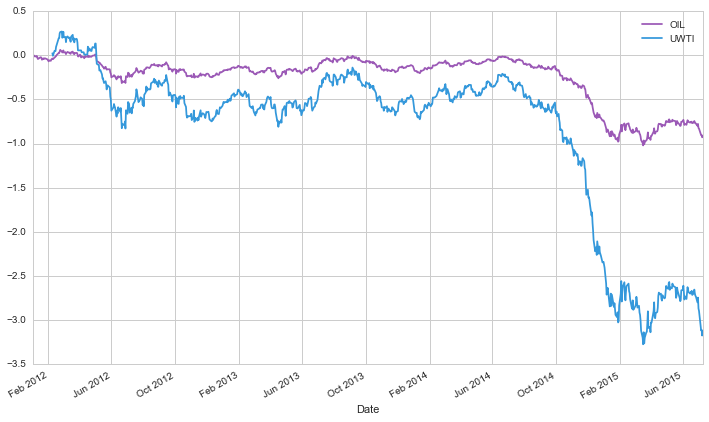

In [7]:
# plot the cumulative returns from 2012 to present
np.log(px.ix['2012':] / px.ix['2012':].shift(1)).cumsum().plot(figsize=size)

Barplot to view the difference in returns

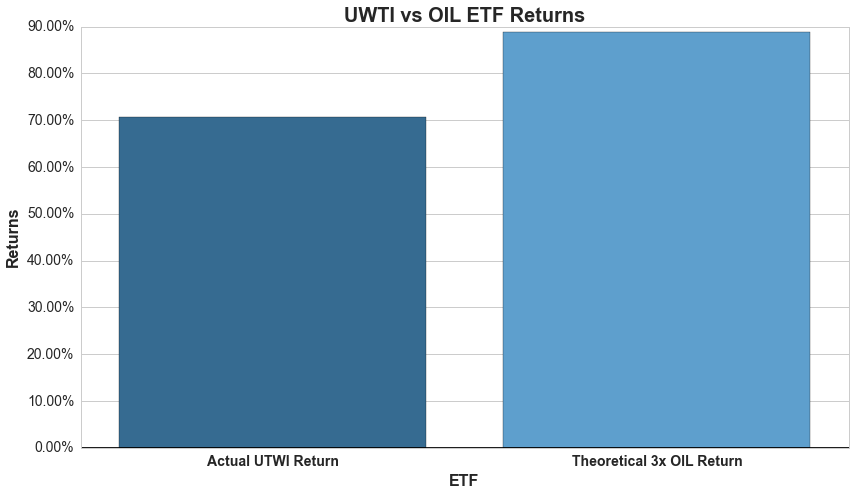

In [8]:
y = np.asarray([theoretical_3xOIL_ret, actual_UTWI_ret])
s = pd.DataFrame(y, index=['Theoretical 3x OIL Return', 'Actual UTWI Return'])

from matplotlib.ticker import FuncFormatter
def to_pct(y, pos=0):
    return "%1.2f%%" % (100*y)
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# plot code
f = plt.figure(figsize=size)
sns.barplot(x=s.index, y=y, data=s, palette="Blues_d")
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_pct))                    
plt.xticks(rotation=0, fontsize=14, fontweight='demibold')
plt.yticks(rotation=0, fontsize=14)
plt.axhline(0, color='k')
plt.title('UWTI vs OIL ETF Returns', fontsize=20, fontweight='demibold')
#plt.xticks(self.bar_rets.index, self.bar_rets['index'])
plt.xlabel('ETF', fontsize=16, fontweight='demibold')
plt.ylabel('Returns', fontsize=16, fontweight='demibold')
plt.tight_layout()

In [9]:
from IPython.core.display import HTML 

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [10]:
from IPython.core.display import HTML 
import requests

styles = requests.get("https://raw.githubusercontent.com/BlackArbsCEO/BlackArbsCEO.github.io/Equity-Analysis/Equity%20Analysis/custom.css")
HTML(styles.text)